Reading files and merging the to form a single file

In [74]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('task2a.csv')
data2 = pd.read_csv('task2b.csv')

output=pd.merge(data1, data2, on='id_student', how='right')




In [75]:
output

,Unnamed: 0,id_student,gender,region,highest_education,age_band,disability,final_result,score,click_events
0,403.0,6516,M,Scotland,HE Qualification,55<=,N,Pass,62.0,2791.0
1,14047.0,8462,M,London Region,HE Qualification,55<=,N,Withdrawn,87.0,656.0
2,14048.0,8462,M,London Region,HE Qualification,55<=,N,Withdrawn,87.0,656.0
3,0.0,11391,M,East Anglian Region,HE Qualification,55<=,N,Pass,82.0,934.0
4,713.0,23629,F,East Anglian Region,Lower Than A Level,0-35,N,Fail,83.0,NaN
...,...,...,...,...,...,...,...,...,...,...
29446,402.0,2698257,M,East Midlands Region,Lower Than A Level,0-35,N,Pass,68.0,758.0
29447,9731.0,2698535,M,Wales,Lower Than A Level,0-35,N,Withdrawn,40.0,4241.0
29448,9732.0,2698535,M,Wales,Lower Than A Level,0-35,N,Pass,40.0,4241.0
29449,6955.0,2698577,F,Wales,Lower Than A Level,35-55,N,Fail,65.0,717.0


Remove unwanted columns

In [76]:
lists= []
for i in output:
    lists.append(i)
df = pd.DataFrame(output, columns=lists)
new_df=df.dropna().drop(columns=["region", "final_result", "highest_education"])

In [77]:
new_df

,Unnamed: 0,id_student,gender,age_band,disability,score,click_events
0,403.0,6516,M,55<=,N,62.0,2791.0
1,14047.0,8462,M,55<=,N,87.0,656.0
2,14048.0,8462,M,55<=,N,87.0,656.0
3,0.0,11391,M,55<=,N,82.0,934.0
5,9733.0,23698,F,0-35,N,75.0,910.0
...,...,...,...,...,...,...,...
29446,402.0,2698257,M,0-35,N,68.0,758.0
29447,9731.0,2698535,M,0-35,N,40.0,4241.0
29448,9732.0,2698535,M,0-35,N,40.0,4241.0
29449,6955.0,2698577,F,35-55,N,65.0,717.0


Dropping NaN values for click events

In [78]:
for (columnName, columnData) in new_df.items():
    if columnName=="click_events" :
        for values in columnData:
            if values<10:
                new_df=new_df.replace(values, np.nan)

new_df=new_df.dropna()

In [79]:
new_df

,Unnamed: 0,id_student,gender,age_band,disability,score,click_events
0,403.0,6516,M,55<=,N,62.0,2791.0
1,14047.0,8462,M,55<=,N,87.0,656.0
2,14048.0,8462,M,55<=,N,87.0,656.0
3,0.0,11391,M,55<=,N,82.0,934.0
5,9733.0,23698,F,0-35,N,75.0,910.0
...,...,...,...,...,...,...,...
29446,402.0,2698257,M,0-35,N,68.0,758.0
29447,9731.0,2698535,M,0-35,N,40.0,4241.0
29448,9732.0,2698535,M,0-35,N,40.0,4241.0
29449,6955.0,2698577,F,35-55,N,65.0,717.0


Scatter plotting clicked events to score

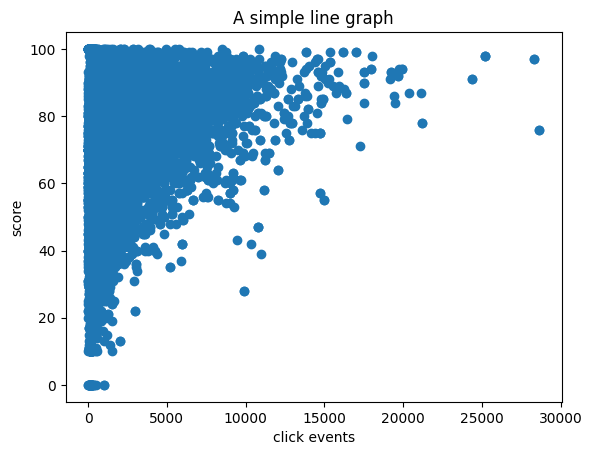

In [80]:
import matplotlib.pyplot as plt
x=[]
y=[]
for (columnName, columnData) in new_df.items():
    if columnName=="click_events" :
        for values in columnData:
            x.append(values)
for (columnName, columnData) in new_df.items():
    if columnName=="score" :
        for values in columnData:
            y.append(values)


plt.scatter(x,y)
plt.xlabel('click events')
plt.ylabel('score')
plt.title("A simple line graph")
plt.show()

In [81]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(x, y)

C:\Users\hp\AppData\Local\Temp\ipykernel_8176\4076558070.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.27247954484099557, pvalue=0.0)

**Here’s how to interpret the output**:

Pearson correlation coefficient (r): 0.2725
Two-tailed p-value: 0.0
Since the correlation coefficient is close to 0, this tells us that there is almost no association between the two variables.

And since the corresponding p-value is less than .05, we conclude that there is a statistically significant association between the two variables.

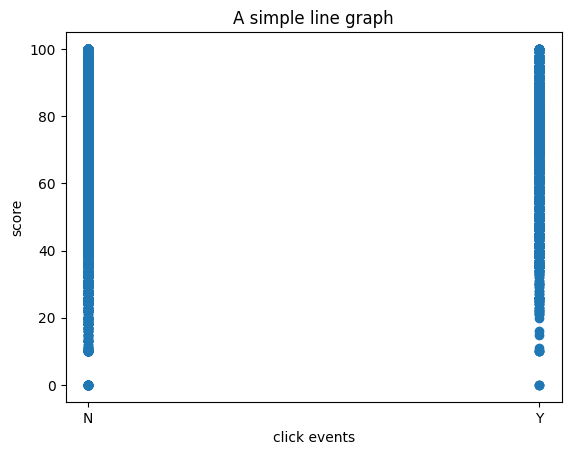

In [83]:
x=[]
y=[]
for (columnName, columnData) in new_df.items():
    if columnName=="disability" :
        for values in columnData:
            x.append(values)
for (columnName, columnData) in new_df.items():
    if columnName=="score" :
        for values in columnData:
            y.append(values)


plt.scatter(x,y)
plt.xlabel('click events')
plt.ylabel('score')
plt.title("A simple line graph")
plt.show()

In [84]:
Disabled=[]
Abled=[]
for i in range(len(x)):
    for j in range(len(y)):
        if i==j and x[i]=="Y":
            Disabled.append(y[i])
        elif i==j and x[i]=="N":
            Abled.append(y[i])



In [85]:

Disabled_score=[]
Abled_score=[]

Abled_index=new_df.index[new_df['disability']=="N"].tolist()
Disabled_index=new_df.index[new_df['disability']=="Y"].tolist()



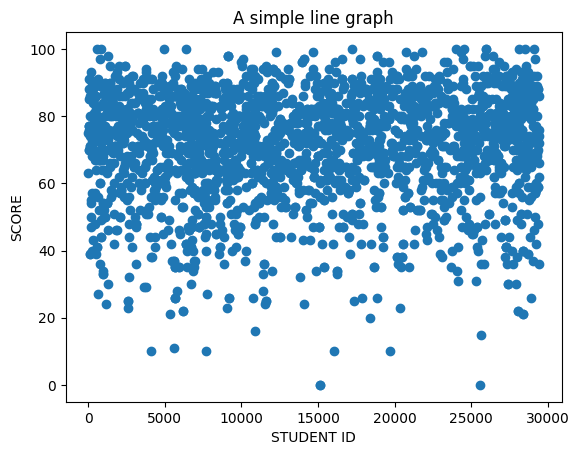

In [88]:
plt.scatter(Disabled_index,Disabled)
plt.xlabel('STUDENT ID')
plt.ylabel('SCORE')
plt.title("A simple line graph")
plt.show()

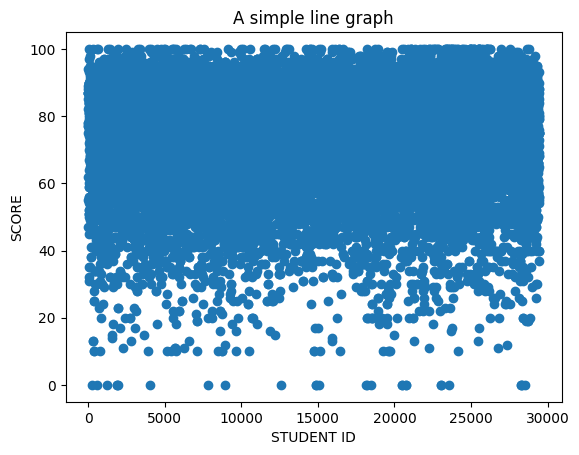

In [89]:
plt.scatter(Abled_index,Abled)
plt.xlabel('STUDENT ID')
plt.ylabel('SCORE')
plt.title("A simple line graph")
plt.show()